<a href="https://colab.research.google.com/github/Ganna475/Irrigation-Crop-Machine-Learning-Models/blob/main/SalesForecasting(cars).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  SalesForecasting (Used Car Data )

### 1. Importing all the essential libraries

In [ ]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 112.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import gradio as gr


## 1. Data Reading and Inspection
The data has been successfully loaded. It contains 23 columns, including details such as:
- Make and model.
- Body type.
- Price.
- Vehicle condition.
- Fuel type.
- Mileage.
- Horsepower.

### Loading the data And Inspecting the first 5 rows:
```python

```


In [ ]:
df = pd.read_csv('final_scout_not_dummy.csv')
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1



## 2. Data Cleaning
We have converted columns containing numbers stored as text into numeric types and removed extra spaces from textual columns.


```python



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

### Checking for missing values:

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
make_model,0
body_type,0
price,0
vat,0
km,0
Type,0
Fuel,0
Gears,0
Comfort_Convenience,0
Entertainment_Media,0


### Checking for Duplicated values:

In [ ]:
Duplicated=df.duplicated()
Duplicated.sum()

np.int64(1673)

In [ ]:
# Remove duplicate rows based on all columns
df = df.drop_duplicates()

In [ ]:
Duplicated=df.duplicated()
Duplicated.sum()

np.int64(0)



### Checking data types:
```python

```

In [ ]:

df.dtypes

,0
make_model,object
body_type,object
price,int64
vat,object
km,float64
Type,object
Fuel,object
Gears,float64
Comfort_Convenience,object
Entertainment_Media,object



## 3. Exploratory Data Analysis (EDA)
We have explored the basic distribution of some columns such as price, mileage, and age.


In [ ]:


df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,...,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",...,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.0,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...",...,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.0,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer",...,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.0,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.0,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",...,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1


In [ ]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000,14242.000000
mean,18100.969457,32582.109593,5.939545,1.415040,1.040795,88.713453,0.256284,1432.889763,1342.399312,4.825183
std,7421.213772,36856.863207,0.702846,1.109537,0.337413,26.548219,0.436596,277.506916,201.246784,0.862170
min,4950.000000,0.000000,5.000000,0.000000,0.000000,40.000000,0.000000,890.000000,840.000000,3.000000
25%,12950.000000,3898.000000,5.000000,0.000000,1.000000,66.000000,0.000000,1229.000000,1165.000000,4.100000
50%,16950.000000,21000.000000,6.000000,1.000000,1.000000,85.000000,0.000000,1461.000000,1320.000000,4.800000
75%,21900.000000,47000.000000,6.000000,2.000000,1.000000,103.000000,1.000000,1598.000000,1487.000000,5.400000
max,74600.000000,317000.000000,8.000000,3.000000,4.000000,294.000000,1.000000,2967.000000,2471.000000,9.100000


In [ ]:
make_model = data[['make_model']].value_counts()
make_model

NameError: name 'data' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
make_model.plot(kind='bar')
plt.title('Frequency of Car Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'make_model' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
data[['body_type']]

NameError: name 'data' is not defined

In [ ]:
body_type = data['body_type'].value_counts()
body_type

NameError: name 'data' is not defined

In [ ]:
body_type.describe()

NameError: name 'body_type' is not defined

In [ ]:
plt.figure(figsize=(10, 6))
body_type.plot(kind='bar')
plt.title('Frequency of Body Types')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'body_type' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
data[['price']].describe()

,price
count,15915.000000
mean,18024.380584
std,7381.679318
min,4950.000000
25%,12850.000000
50%,16900.000000
75%,21900.000000
max,74600.000000


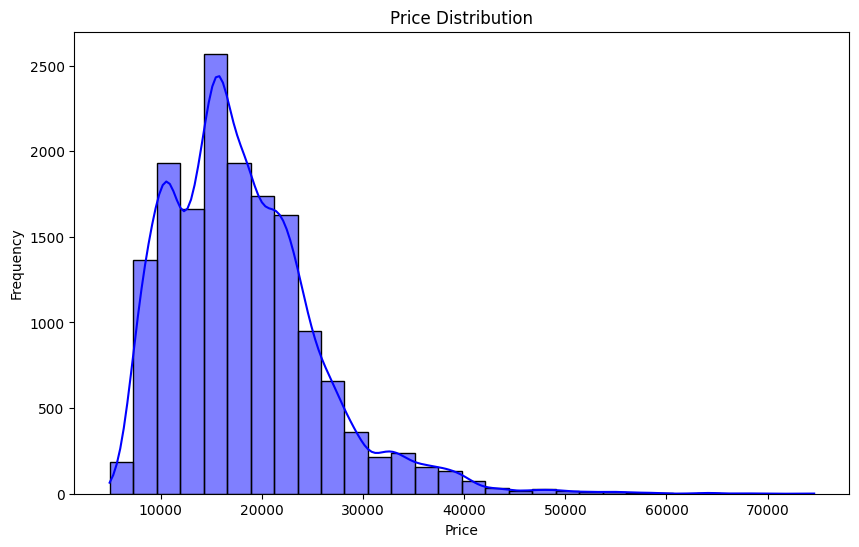

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='blue', bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df[['vat']]

,vat
0,VAT deductible
1,Price negotiable
2,VAT deductible
3,VAT deductible
4,VAT deductible
...,...
15907,VAT deductible
15908,VAT deductible
15909,VAT deductible
15911,VAT deductible


In [ ]:
df[['vat']].describe()

,vat
count,14242
unique,2
top,VAT deductible
freq,13426


In [ ]:
df[['vat']].value_counts()

vat             
VAT deductible      13426
Price negotiable      816
Name: count, dtype: int64

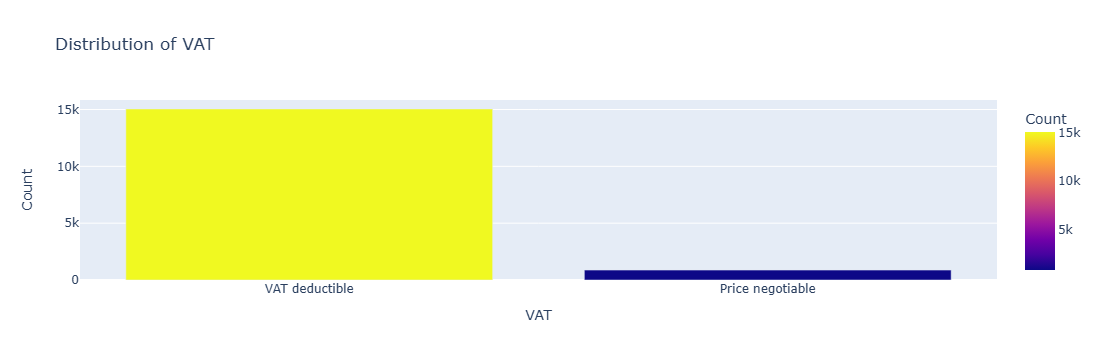

In [ ]:
vat_data = data['vat'].value_counts().reset_index()
vat_data.columns = ['vat', 'count']

fig = px.bar(vat_data, x='vat', y='count',
             title='Distribution of VAT',
             labels={'vat': 'VAT', 'count': 'Count'},
             color='count',
             orientation='v')

# Show the plot
fig.show()

In [ ]:
df[['km']]

,km
0,56013.000000
1,80000.000000
2,83450.000000
3,73000.000000
4,16200.000000
...,...
15907,100.000000
15908,1647.362609
15909,1000.000000
15911,9900.000000


In [ ]:
df[['km']].describe()

,km
count,14242.000000
mean,32582.109593
std,36856.863207
min,0.000000
25%,3898.000000
50%,21000.000000
75%,47000.000000
max,317000.000000


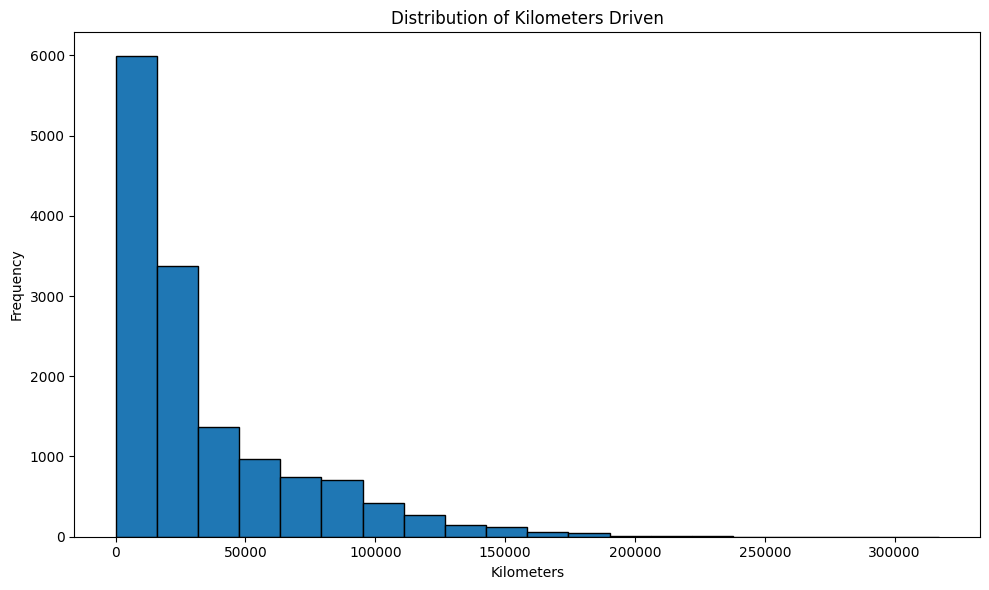

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df[['km']], bins=20, edgecolor='black')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
data[['Type']]

,Type
0,Used
1,Used
2,Used
3,Used
4,Used
...,...
15910,New
15911,Used
15912,Pre-registered
15913,Pre-registered


In [ ]:
type_data = data[['Type']].value_counts()
type_data

Type          
Used              11095
New                1649
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: count, dtype: int64

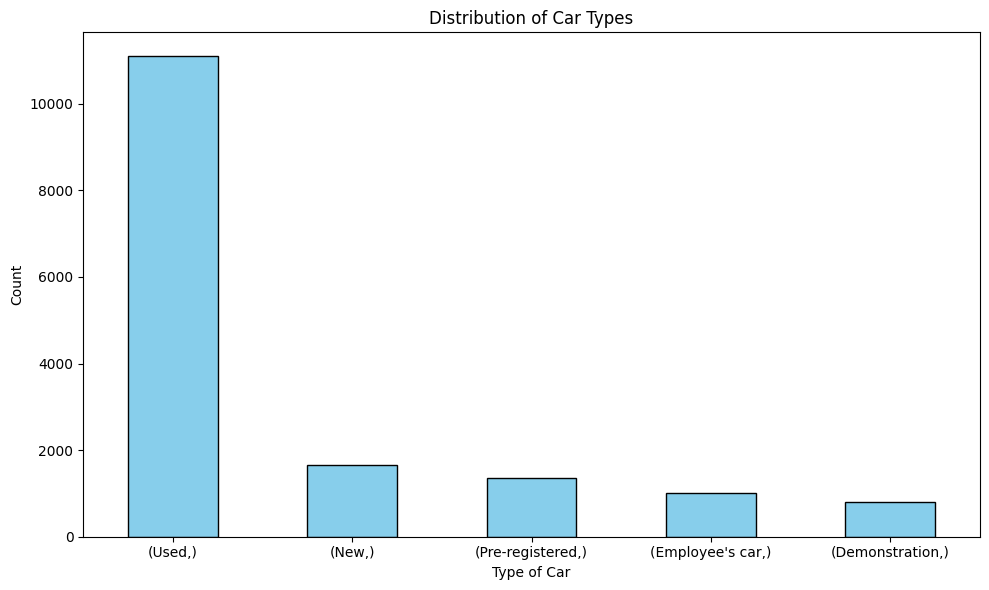

In [ ]:
plt.figure(figsize=(10, 6))
type_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Car Types')
plt.xlabel('Type of Car')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
data[['Fuel']]

,Fuel
0,Diesel
1,Benzine
2,Diesel
3,Diesel
4,Diesel
...,...
15910,Diesel
15911,Benzine
15912,Diesel
15913,Diesel


In [ ]:
fuel_data = data['Fuel'].value_counts()

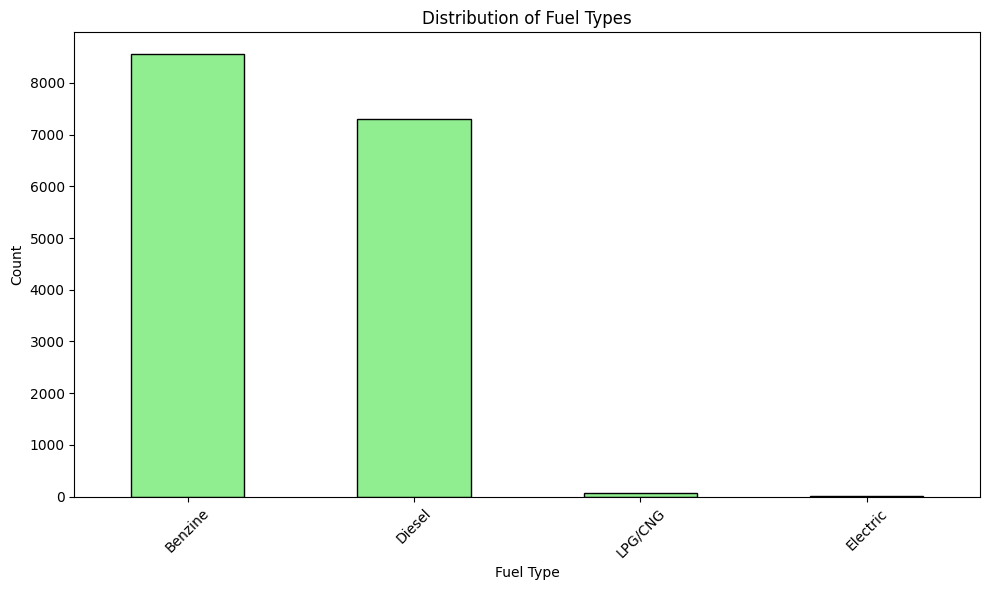

In [ ]:
plt.figure(figsize=(10, 6))
fuel_data.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data[['Gears']]

,Gears
0,7.0
1,7.0
2,7.0
3,6.0
4,7.0
...,...
15910,6.0
15911,7.0
15912,6.0
15913,6.0


In [ ]:
gears_data = data['Gears'].value_counts()
gears_data

Gears
6.0    8623
5.0    4257
7.0    2810
8.0     225
Name: count, dtype: int64

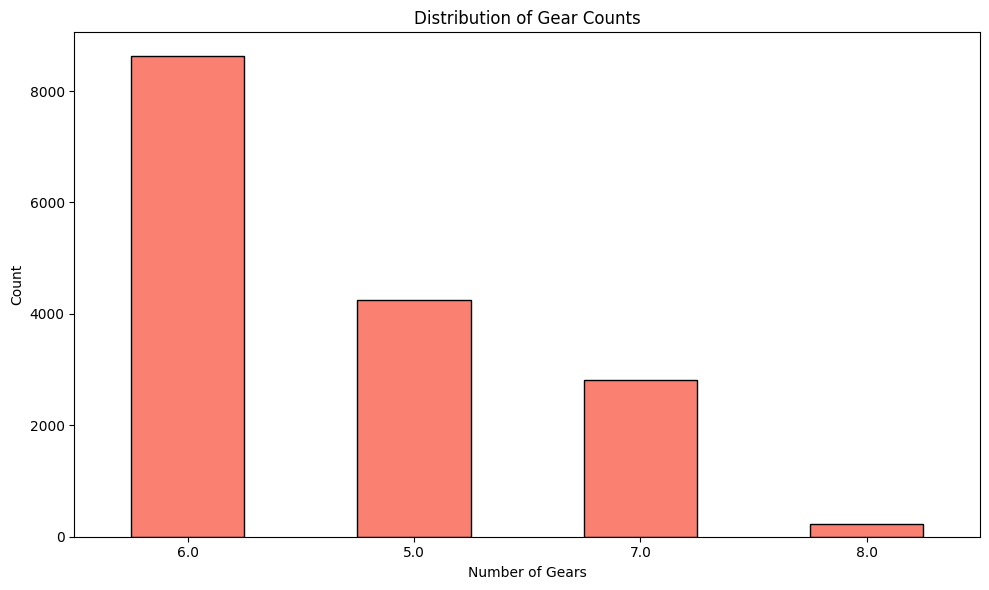

In [ ]:
plt.figure(figsize=(10, 6))
gears_data.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Gear Counts')
plt.xlabel('Number of Gears')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
previous_owners_data = data['Previous_Owners'].value_counts()
previous_owners_data

Previous_Owners
1.0    14158
2.0     1172
0.0      554
3.0       29
4.0        2
Name: count, dtype: int64

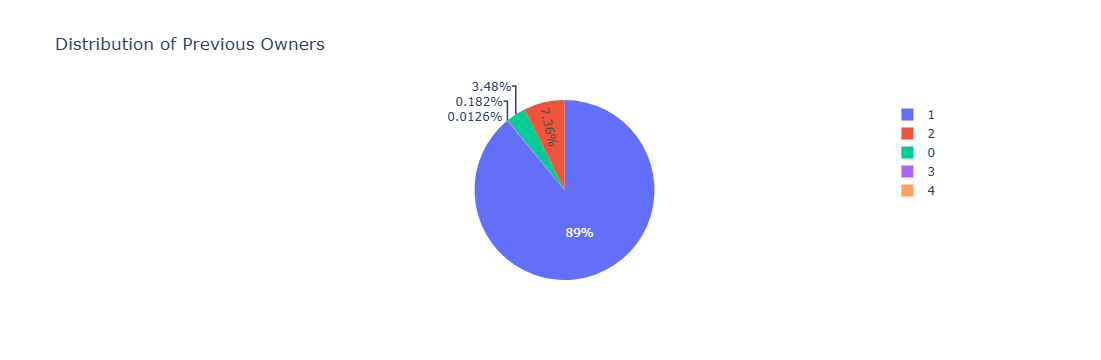

In [ ]:
previous_owners_data = data['Previous_Owners'].value_counts().reset_index()
previous_owners_data.columns = ['Previous_Owners', 'Count']
fig = px.pie(previous_owners_data,
             names='Previous_Owners',
             values='Count',
             title='Distribution of Previous Owners')

# Show the plot
fig.show()

In [ ]:
data[['hp_kW']]

,hp_kW
0,66.0
1,141.0
2,85.0
3,66.0
4,66.0
...,...
15910,147.0
15911,165.0
15912,146.0
15913,147.0


In [ ]:
hp_kw_statistics = data[['hp_kW']].describe()
hp_kw_statistics

,hp_kW
count,15915.000000
mean,88.499340
std,26.674341
min,40.000000
25%,66.000000
50%,85.000000
75%,103.000000
max,294.000000


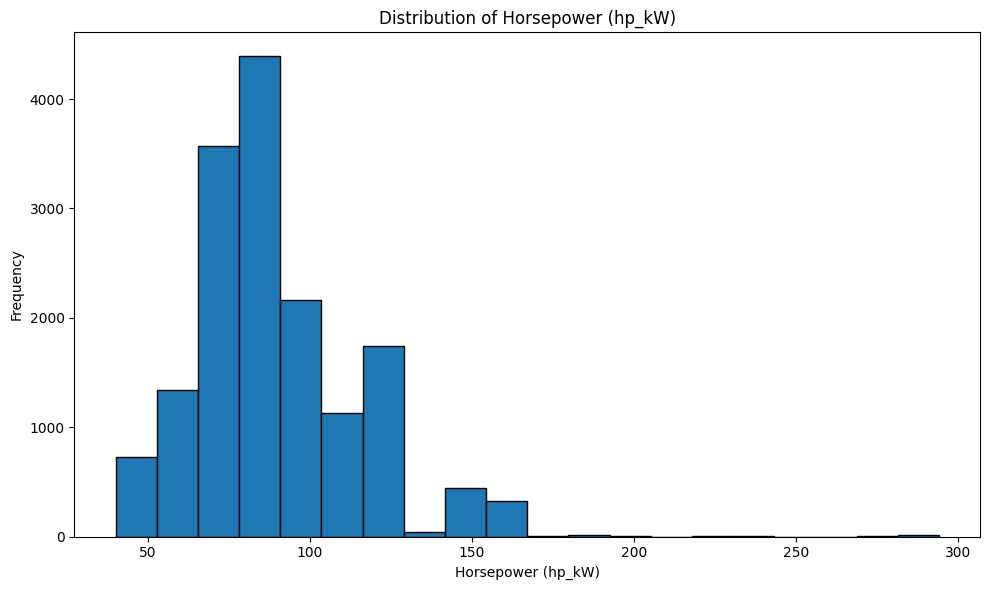

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data[['hp_kW']], bins=20, edgecolor='black')
plt.title('Distribution of Horsepower (hp_kW)')
plt.xlabel('Horsepower (hp_kW)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
data[['Displacement_cc']]

,Displacement_cc
0,1422.0
1,1798.0
2,1598.0
3,1422.0
4,1422.0
...,...
15910,1997.0
15911,1798.0
15912,1997.0
15913,1997.0


In [ ]:
displacement_statistics = data[['Displacement_cc']].describe()
displacement_statistics

,Displacement_cc
count,15915.000000
mean,1428.661891
std,275.804272
min,890.000000
25%,1229.000000
50%,1461.000000
75%,1598.000000
max,2967.000000


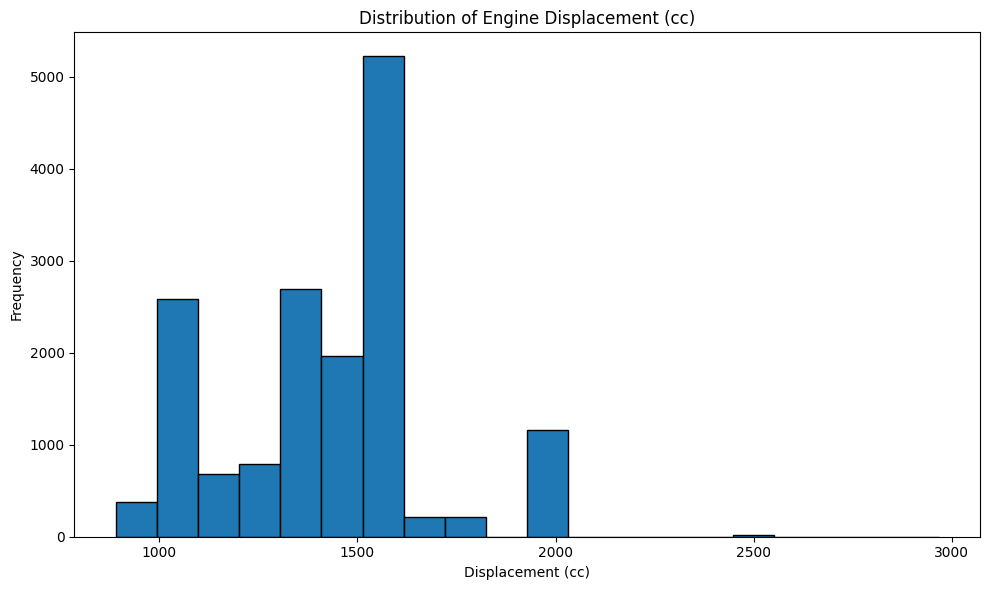

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist( data[['Displacement_cc']], bins=20, edgecolor='black')
plt.title('Distribution of Engine Displacement (cc)')
plt.xlabel('Displacement (cc)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
data[['Gearing_Type']]

,Gearing_Type
0,Automatic
1,Automatic
2,Automatic
3,Automatic
4,Automatic
...,...
15910,Automatic
15911,Automatic
15912,Automatic
15913,Automatic


In [ ]:
df['Gearing_Type'].value_counts()

Gearing_Type
Manual            7232
Automatic         6546
Semi-automatic     464
Name: count, dtype: int64

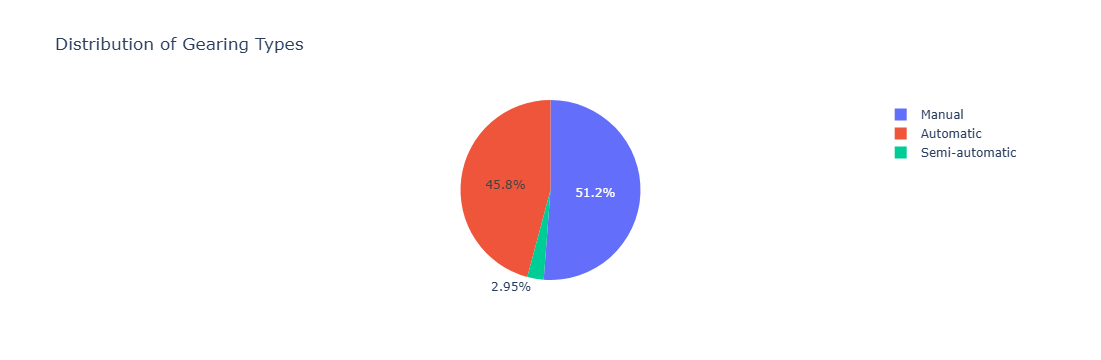

In [ ]:
gearing_type_data = data['Gearing_Type'].value_counts().reset_index()
gearing_type_data.columns = ['Gearing_Type', 'Count']

fig = px.pie(gearing_type_data,
             names='Gearing_Type',
             values='Count',
             title='Distribution of Gearing Types')

# Show the plot
fig.show()

### Correlation Matrix with markers (we can't add direct markers, but you can customize the colors based on correlation values):

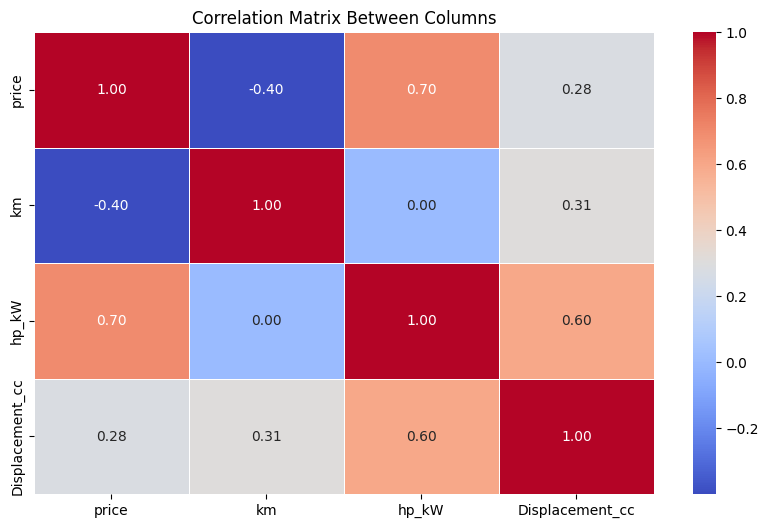

In [ ]:
correlation_matrix = data[['price', 'km', 'hp_kW', 'Displacement_cc']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Between Columns')
plt.show()

### Scatter Plots with markers:

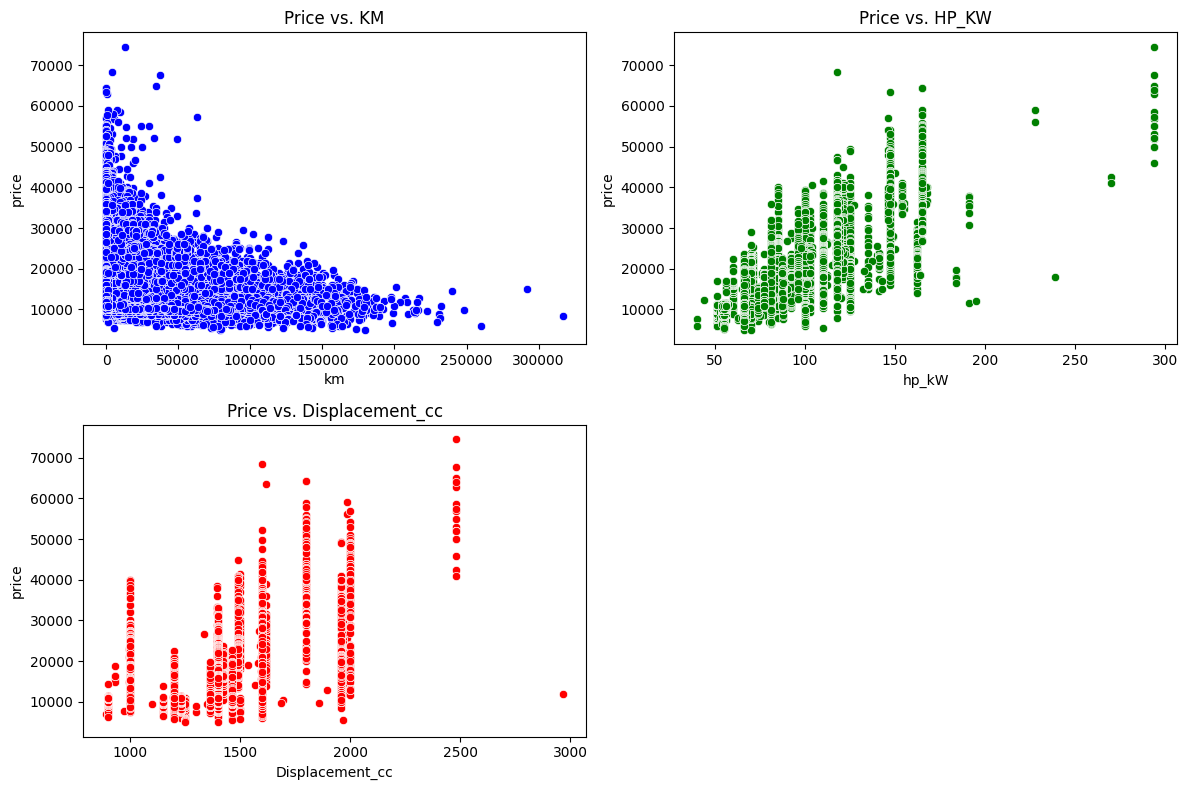

In [ ]:
# Create scatter plots to analyze relationships between columns
plt.figure(figsize=(12, 8))

# Scatter plot between 'price' and 'km'
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='km', y='price', color='blue')
plt.title('Price vs. KM')

# Scatter plot between 'price' and 'hp_kW'
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='hp_kW', y='price', color='green')
plt.title('Price vs. HP_KW')

# Scatter plot between 'price' and 'Displacement_cc'
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='Displacement_cc', y='price', color='red')
plt.title('Price vs. Displacement_cc')

plt.tight_layout()
plt.show()

### Joint Plot with markers:

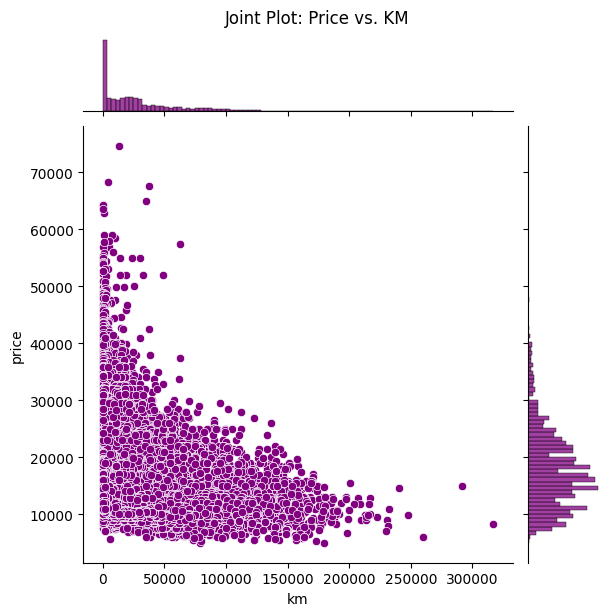

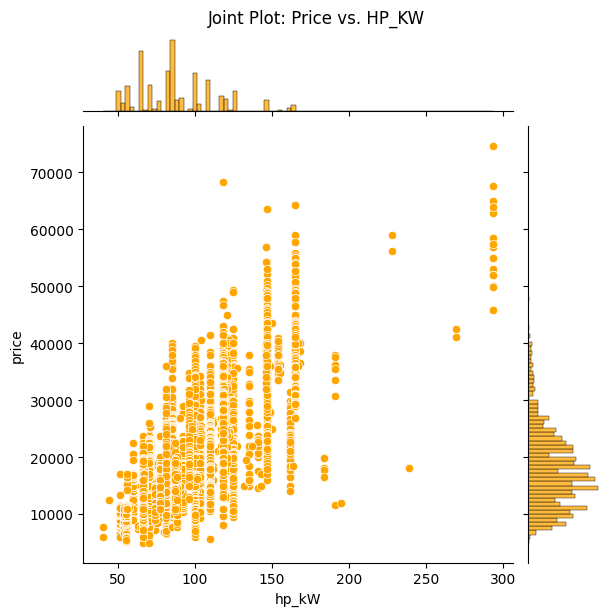

In [ ]:
# Create a joint plot to analyze the relationship between 'price' and 'km'
sns.jointplot(data=data, x='km', y='price', kind='scatter', color='purple')
plt.suptitle('Joint Plot: Price vs. KM', y=1.02)
plt.show()

# Create a joint plot to analyze the relationship between 'price' and 'hp_kW'
sns.jointplot(data=data, x='hp_kW', y='price', kind='scatter', color='orange')
plt.suptitle('Joint Plot: Price vs. HP_KW', y=1.02)
plt.show()

### Creating Box

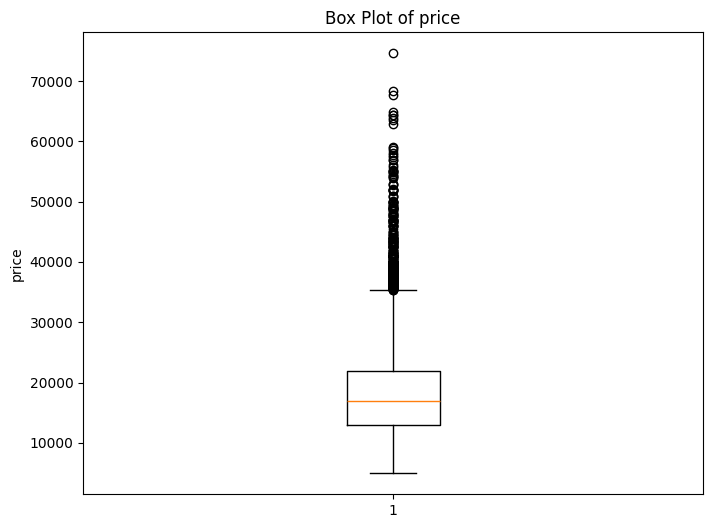

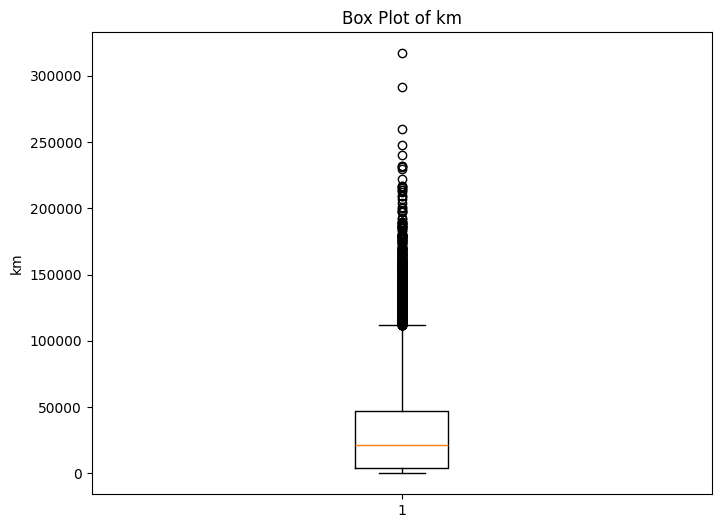

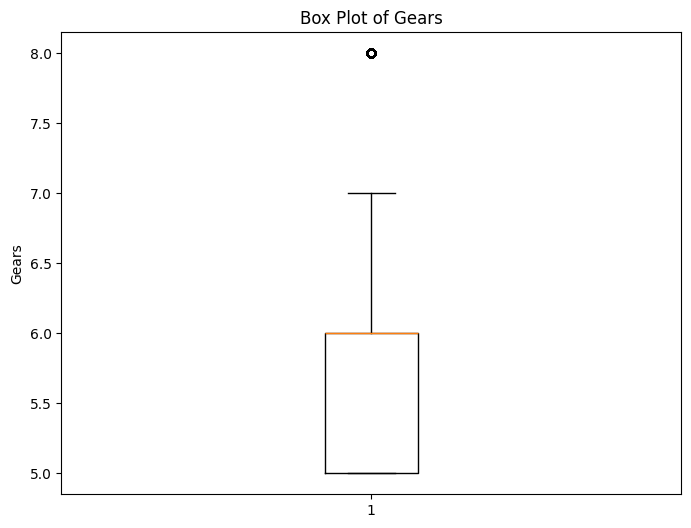

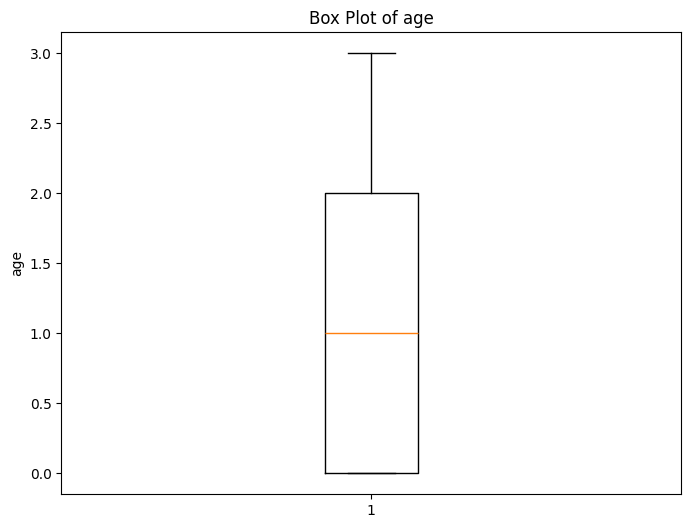

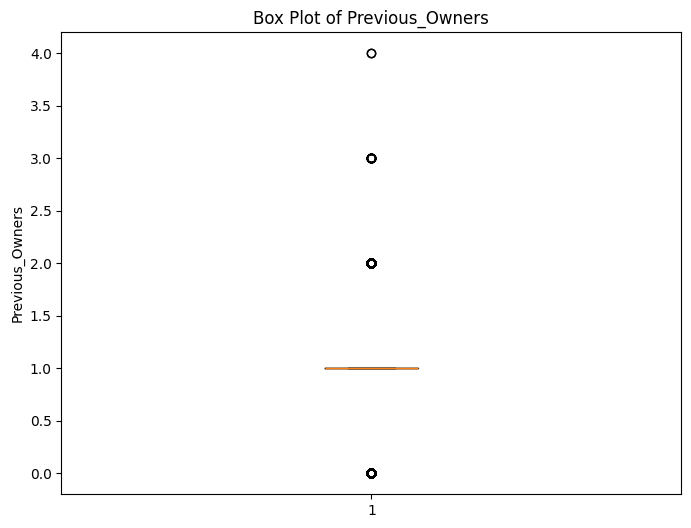

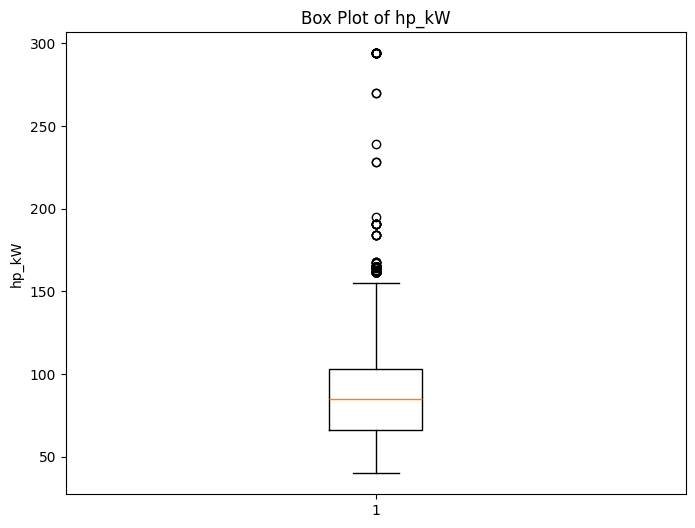

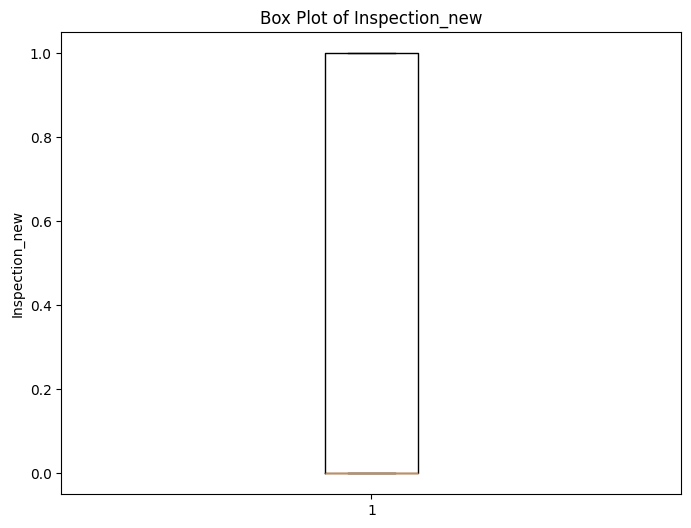

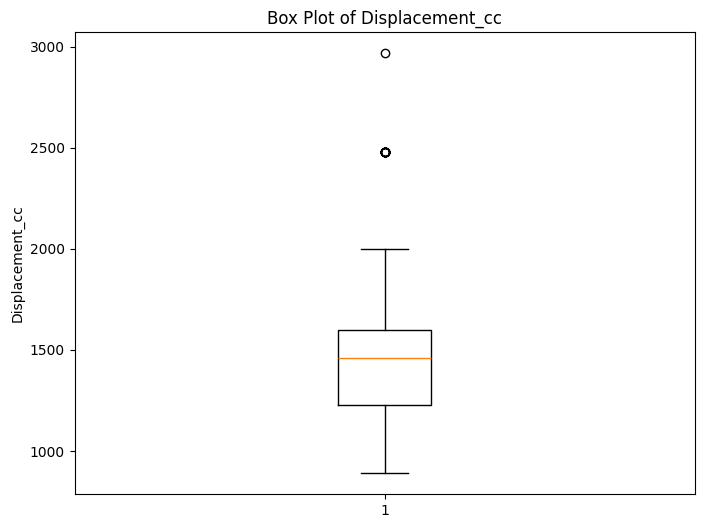

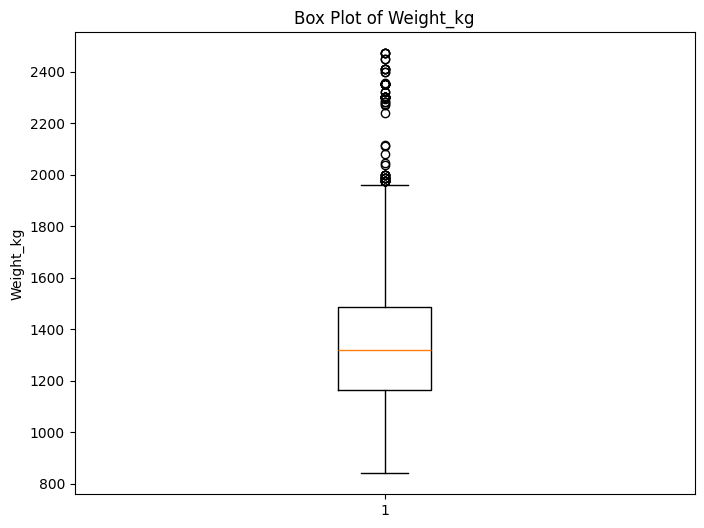

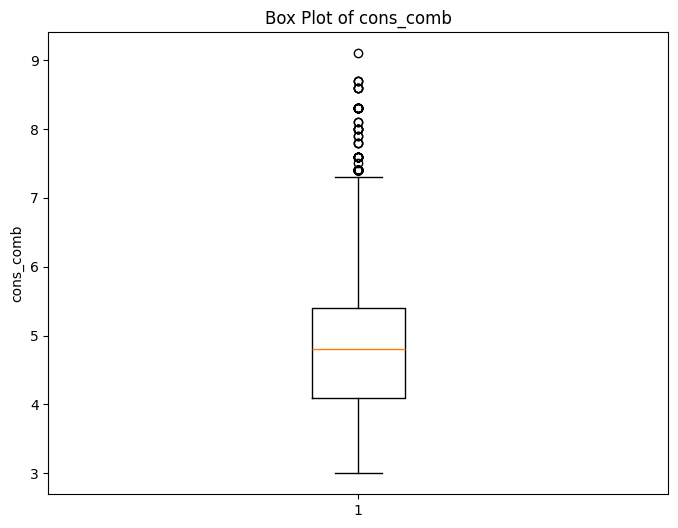

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[feature].dropna())
  plt.title(f"Box Plot of {feature}")
  plt.ylabel(feature)
  plt.show()

# Prepare the data for the model

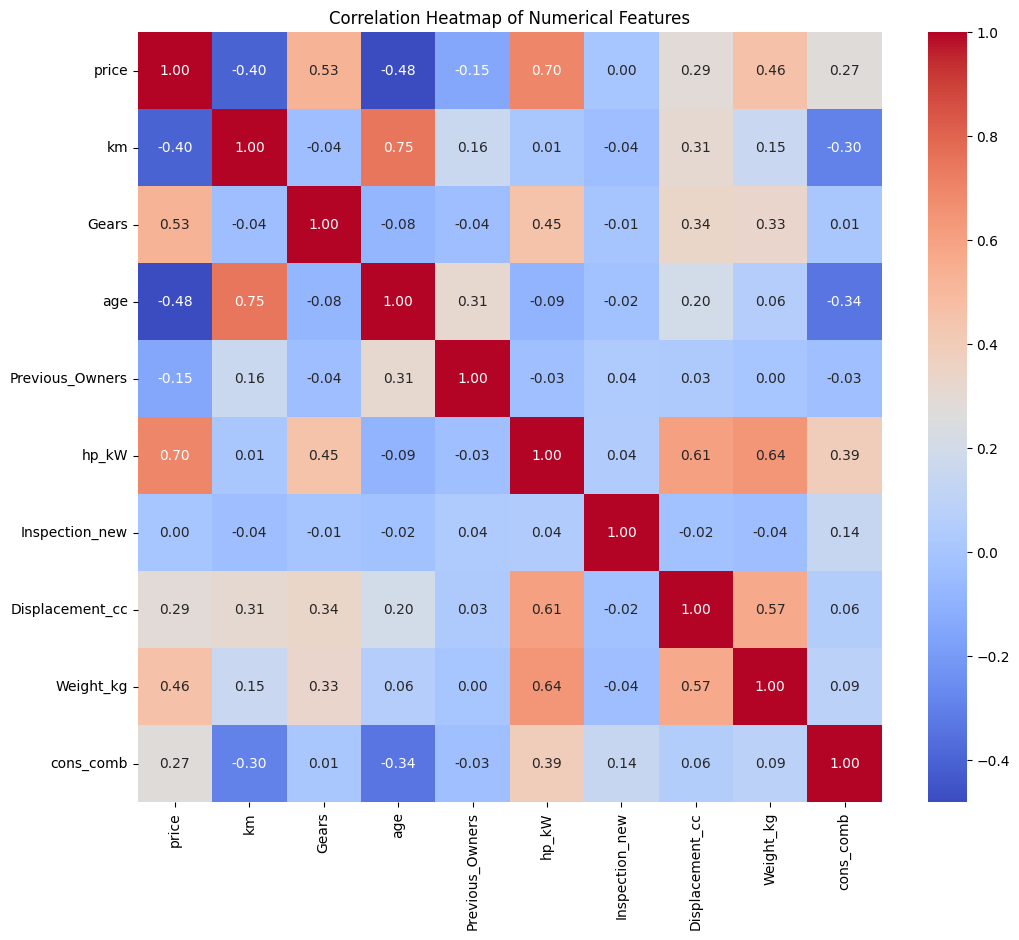

In [ ]:
import seaborn as sns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Outlier Removal

In [ ]:
# Select only numerical columns
numerical_data = df.select_dtypes(include=np.number)

# Calculate IQR for numerical columns
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_no_outliers = df[~((numerical_data < (Q1 - 1.5 * IQR)) | (numerical_data > (Q3 + 1.5 * IQR))).any(axis=1)]


### Categorical Encoding

In [ ]:
# Using Label Encoding for categorical columns
df['Type_encoded'] = df['Type'].astype('category').cat.codes
df['Fuel_encoded'] = df['Fuel'].astype('category').cat.codes


### Feature Scaling

In [ ]:
scaler = StandardScaler()
df[['price', 'hp_kW', 'Displacement_cc']] = scaler.fit_transform(df[['price', 'hp_kW', 'Displacement_cc']])


### Feature-Target Split

In [ ]:
X = df[['km', 'hp_kW', 'Displacement_cc', 'Type_encoded', 'Fuel_encoded']]  # Features
y = df['price']  # Target

### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Distribution Analysis

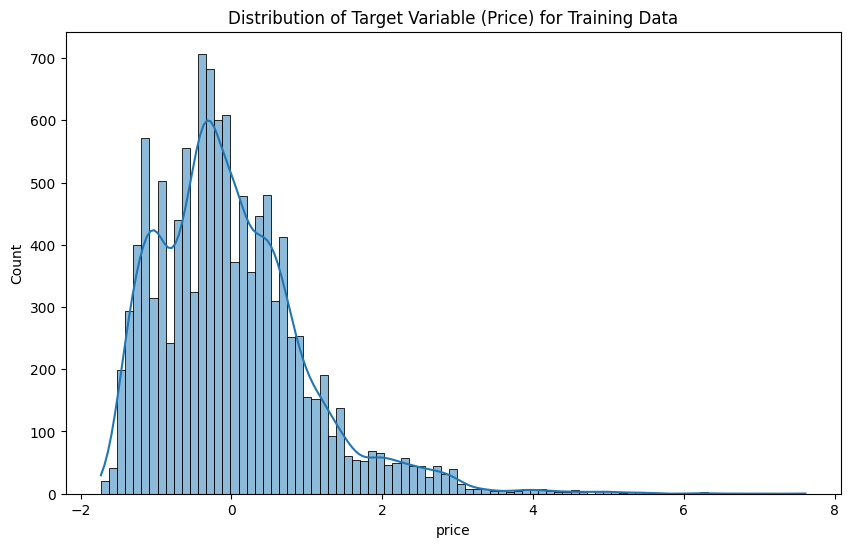

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Target Variable (Price) for Training Data')
plt.show()

### Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Selection

In [ ]:
model_Linear = LinearRegression()

In [ ]:
model_Linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

0.3015152250511767

In [ ]:
r2 = r2_score(y_test, y_pred)


In [ ]:
r2

0.7027789057883764

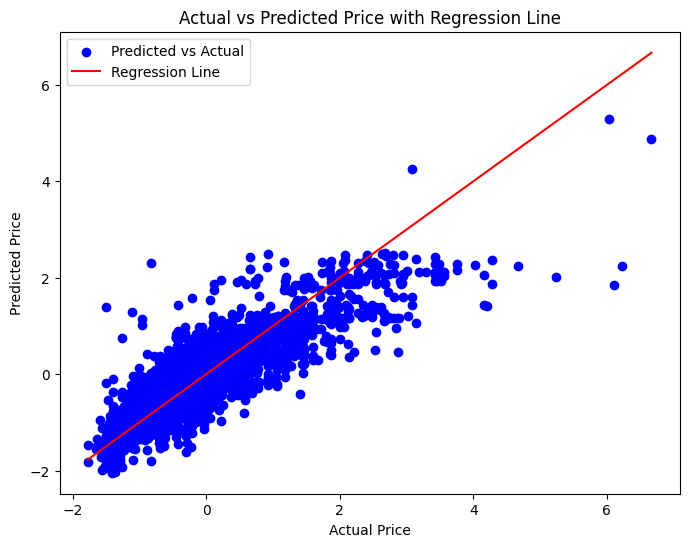

In [ ]:
# Plotting the actual vs predicted values with the regression line
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')  # Scatter plot for actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')  # Line of best fit
plt.title('Actual vs Predicted Price with Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

### Random Forest

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [ ]:
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R-squared: {r2_rf}')

Random Forest - Mean Squared Error: 0.1644587701006167
Random Forest - R-squared: 0.8378834249789325


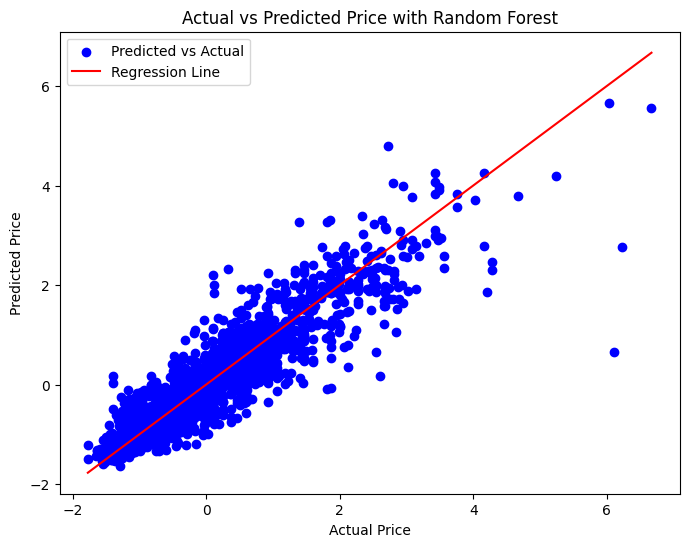

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', label='Predicted vs Actual')  # Scatter plot for actual vs predicted
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')  # Line of best fit
plt.title('Actual vs Predicted Price with Random Forest')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

## Save model

In [ ]:
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved successfully!")

Model saved successfully!


### Load Model

In [ ]:
rf_model_loaded = joblib.load('random_forest_model.pkl')
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
def predict_price(km, hp_kW, Displacement_cc, Type_encoded, Fuel_encoded):

    input_data = np.array([[km, hp_kW, Displacement_cc, Type_encoded, Fuel_encoded]])


    predicted_price = rf_model.predict(input_data)

    return predicted_price[0]


iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Kilometers (km)", value=100000),
        gr.Number(label="Horsepower (hp_kW)", value=150),
        gr.Number(label="Engine Displacement (cc)", value=2000),
        gr.Number(label="Car Type (encoded)", value=1),  # 1 for New, 0 for Used
        gr.Number(label="Fuel Type (encoded)", value=0)   # 0 for Petrol, 1 for Diesel, etc.
    ],
    outputs="text",
    live=True,
    title="Car Price Prediction",
    description="Enter car features to predict the price."
)

# Launch the interface
iface.launch()

* Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [ ]:

comparison_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})
print(comparison_df.head())

       Actual Price  Predicted Price
5174       1.178963         0.577484
5815      -0.419214         0.247226
2262       0.449273         0.387356
10208     -0.959576        -0.691345
5960      -0.704892        -0.408973
